In [135]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import plotly
import numpy as np

***important note:***
- hop_teaming nashville contains all entity type 1 doctors from nashville
- hop_teaming_tn contains all entity type 1 doctors from nashville cbsa and all entity type 2 facilities from tn

In [2]:
db = sqlite3.connect('data/hop_team.sqlite')

In [3]:
db.execute('CREATE INDEX from_npi ON nucc(from_npi)')

In [4]:
db.execute('CREATE INDEX to_npi ON nucc(to_npi)')

In [3]:
db.close()

In [8]:
query = '''
WITH from_npi_list AS (
SELECT npi
FROM npi
WHERE entity_type_code = 1.0
),
to_npi_list AS (
SELECT npi
FROM npi
WHERE entity_type_code = 2.0
)
SELECT * 
FROM nucc
WHERE from_npi IN from_npi_list 
AND to_npi IN to_npi_list
'''

with sqlite3.connect('data/hop_team.sqlite') as db:
    filtered_hop = pd.read_sql(query,db)

In [9]:
filtered_hop.head()

,from_npi,to_npi,patient_count,transaction_count,average_day_wait,std_day_wait
0,1265564736,1003000209,22,148,0.000,0.000
1,1508948191,1003000217,13,13,58.308,58.890
2,1518902246,1003000217,17,19,58.684,78.352
3,1538309737,1003000217,27,27,114.037,84.773
4,1801826672,1003000217,14,21,46.524,51.874


In [12]:
filtered_hop[filtered_hop['average_day_wait'] == 0]

,from_npi,to_npi,patient_count,transaction_count,average_day_wait,std_day_wait
0,1265564736,1003000209,22,148,0.0,0.0
29,1881710101,1003000217,185,227,0.0,0.0
64,1962528539,1003000217,308,412,0.0,0.0
230,1154383313,1003000274,836,2400,0.0,0.0
382,1790837938,1003000399,20,58,0.0,0.0
...,...,...,...,...,...,...
54527955,1831266428,1992999353,48,342,0.0,0.0
54527988,1942288451,1992999544,310,1049,0.0,0.0
54527995,1275697013,1992999601,33,222,0.0,0.0
54527996,1538430988,1992999775,45,47,0.0,0.0


In [17]:
filtered_hop['patient_count']

127792

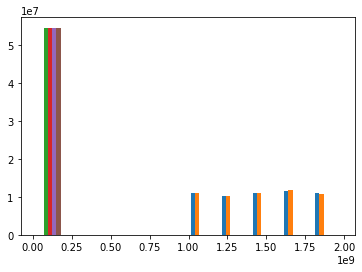

In [19]:
plt.hist(x = filtered_hop[filtered_hop['patient_count'] < 127792 ]);

In [22]:
query = 'PRAGMA table_info ("cbsa")'
with sqlite3.connect('data/hop_team.sqlite') as db:
    tables = pd.read_sql(query,db)

In [23]:
tables

,cid,name,type,notnull,dflt_value,pk
0,0,zip,INTEGER,0,None,0
1,1,cbsa,INTEGER,0,None,0
2,2,usps_zip_pref_city,TEXT,0,None,0
3,3,usps_zip_pref_state,TEXT,0,None,0
4,4,res_ratio,REAL,0,None,0
5,5,bus_ratio,REAL,0,None,0
6,6,oth_ratio,REAL,0,None,0
7,7,tot_ratio,REAL,0,None,0


In [24]:
query = '''
SELECT *
FROM cbsa 
LIMIT 5;
'''
with sqlite3.connect('data/hop_team.sqlite') as db:
    cbsa = pd.read_sql(query,db)

In [25]:
cbsa

,zip,cbsa,usps_zip_pref_city,usps_zip_pref_state,res_ratio,bus_ratio,oth_ratio,tot_ratio
0,683,41900,SAN GERMAN,PR,0.999842,1.0,1.0,0.999855
1,683,32420,SAN GERMAN,PR,0.000158,0.0,0.0,0.000145
2,923,41980,SAN JUAN,PR,1.000000,1.0,1.0,1.000000
3,1010,44140,BRIMFIELD,MA,0.976896,1.0,1.0,0.977816
4,1010,49340,BRIMFIELD,MA,0.023104,0.0,0.0,0.022184


In [42]:
query = '''
SELECT *
FROM npi
LIMIT 5;
'''
with sqlite3.connect('data/hop_team.sqlite') as db:
    npi = pd.read_sql(query,db)

In [43]:
npi

,npi,entity_type_code,provider_organization_name_(legal_business_name),provider_last_name_(legal_name),provider_first_name,provider_middle_name,provider_name_prefix_text,provider_name_suffix_text,provider_credential_text,provider_first_line_business_practice_location_address,provider_second_line_business_practice_location_address,provider_business_practice_location_address_city_name,provider_business_practice_location_address_state_name,provider_business_practice_location_address_postal_code
0,1679576722,1.0,None,WIEBE,DAVID,A,None,None,M.D.,3500 CENTRAL AVE,None,KEARNEY,NE,688472944.0
1,1588667638,1.0,None,PILCHER,WILLIAM,C,DR.,None,MD,1824 KING STREET,SUITE 300,JACKSONVILLE,FL,322044736.0
2,1497758544,2.0,"CUMBERLAND COUNTY HOSPITAL SYSTEM, INC",None,None,None,None,None,None,3418 VILLAGE DR,None,FAYETTEVILLE,NC,283044552.0
3,1306849450,NaN,None,None,None,None,None,None,None,None,None,None,None,NaN
4,1215930367,1.0,None,GRESSOT,LAURENT,None,DR.,None,M.D.,17323 RED OAK DR,None,HOUSTON,TX,770901243.0


In [12]:
query = '''
WITH npi_stuff AS (SELECT 
    npi AS from_npi,
    "provider_organization_name_(legal_business_name)" AS from_org_name,
    "provider_last_name_(legal_name)" AS from_last_name,
    provider_first_name AS from_first_name,
    provider_middle_name AS from_middle_name,
    provider_credential_text AS from_credential,
    provider_first_line_business_practice_location_address AS from_address,
    provider_second_line_business_practice_location_address AS from_2_address,
    provider_business_practice_location_address_city_name AS from_city,
    provider_business_practice_location_address_state_name AS from_state,
    substring(npi.provider_business_practice_location_address_postal_code, 1, 5) AS from_zip
FROM npi),
cbsa_stuff AS (
SELECT 
    zip AS from_zip,
    usps_zip_pref_city AS from_usps_pref_city
FROM cbsa
WHERE cbsa = 34980
)
SELECT *
FROM npi_stuff AS n
INNER JOIN cbsa_stuff AS c
ON n.from_zip = c.from_zip
'''
with sqlite3.connect('data/hop_team.sqlite') as db:
    from_npi = pd.read_sql(query,db)

In [14]:
query = '''
WITH npi_stuff AS (SELECT 
    npi AS to_npi,
    "provider_organization_name_(legal_business_name)" AS to_org_name,
    "provider_last_name_(legal_name)" AS to_last_name,
    provider_first_name AS to_first_name,
    provider_middle_name AS to_middle_name,
    provider_credential_text AS to_credential,
    provider_first_line_business_practice_location_address AS to_address,
    provider_second_line_business_practice_location_address AS to_2_address,
    provider_business_practice_location_address_city_name AS to_city,
    provider_business_practice_location_address_state_name AS to_state,
    substring(npi.provider_business_practice_location_address_postal_code, 1, 5) AS to_zip
FROM npi),
cbsa_stuff AS (
SELECT 
    zip AS to_zip,
    usps_zip_pref_city AS to_usps_pref_city
FROM cbsa
WHERE cbsa = 34980
)
SELECT *
FROM npi_stuff AS n
INNER JOIN cbsa_stuff AS c
ON n.to_zip = c.to_zip
'''
with sqlite3.connect('data/hop_team.sqlite') as db:
    to_npi = pd.read_sql(query,db)

In [15]:
from_npi.isna('')

,from_npi,from_org_name,from_last_name,from_first_name,from_middle_name,from_credential,from_address,from_2_address,from_city,from_state,from_zip,from_zip,from_usps_pref_city
0,1134122187,None,RUDNICKE,CHERYL,DENISE,CRNP,250 25TH AVE N,STE 412,NASHVILLE,TN,37203,37203,NASHVILLE
1,1003819046,None,NYLANDER,BARBARA,H,M.D.,345 23RD AVE N,SUITE 209,NASHVILLE,TN,37203,37203,NASHVILLE
2,1750384780,None,PERRIGIN,JULIE,A,MD,219 CHURCH ST,None,DICKSON,TN,37055,37055,DICKSON
3,1922001957,None,PRESLEY,RICHARD,E,M.D.,2011 MURPHY AVE,STE 302,NASHVILLE,TN,37203,37203,NASHVILLE
4,1073516001,None,ROSS,DAVID,L,MD,127 CRESTVIEW PARK DR,None,DICKSON,TN,37055,37055,DICKSON
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44522,1801540471,None,COULIBALY EPSE DIABATE,KANIDANAN,MARIAME,None,1310 24TH AVE S,None,NASHVILLE,TN,37212,37212,NASHVILLE
44523,1598419103,None,MORRIS,BROOKE,None,FNP-C,3500 N MOUNT JULIET RD STE 201,None,MOUNT JULIET,TN,37122,37122,MOUNT JULIET
44524,1871248435,None,KRAGER,JULIE,ANNE,LMSW,4910 MAIN ST,None,SPRING HILL,TN,37174,37174,SPRING HILL
44525,1184379760,None,GAYLE,KAYLA,DANIELLE,FNP,2325 CRESTMOOR RD STE 101,None,NASHVILLE,TN,37215,37215,NASHVILLE


In [16]:
filtered_hop.shape

(54528012, 6)

In [37]:
hop_teaming_temporary1 = pd.merge(filtered_hop, from_npi, how='inner', on='from_npi')

In [38]:
hop_teaming_temporary1= pd.merge(hop_teaming_temporary1, to_npi, how = 'left', on = 'to_npi')

In [39]:
hop_teaming_temporary1

,from_npi,to_npi,patient_count,transaction_count,average_day_wait,std_day_wait,from_org_name,from_last_name,from_first_name,from_middle_name,...,to_first_name,to_middle_name,to_credential,to_address,to_2_address,to_city,to_state,to_zip,to_zip,to_usps_pref_city
0,1447431275,1003000308,13,13,28.077,53.761,None,WATKINS,JEREMIAH,RAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1447431275,1003863580,37,39,94.179,74.406,None,WATKINS,JEREMIAH,RAY,...,None,None,None,5301 VIRGINIA WAY STE 300,None,BRENTWOOD,TN,37027,37027.0,BRENTWOOD
2,1447431275,1003993965,21,22,38.273,76.875,None,WATKINS,JEREMIAH,RAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1447431275,1013313857,66,67,45.463,59.917,None,WATKINS,JEREMIAH,RAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1447431275,1013455963,14,14,9.357,13.793,None,WATKINS,JEREMIAH,RAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409143,1174850572,1982761896,51,58,0.000,0.000,None,BOROFF-PRAUL,KELLY,ANN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
409144,1386614055,1982893269,26,196,0.000,0.000,None,LOUNSBURY,DONALD,E,...,None,None,None,2600B LEBANON PIKE,None,NASHVILLE,TN,37214,37214.0,NASHVILLE
409145,1598953952,1982893806,11,17,0.000,0.000,None,BRANCH-SMITH,JANNAH,R,...,None,None,None,100 DAMASCUS ST,None,HARTSVILLE,TN,37074,37074.0,HARTSVILLE
409146,1194148122,1992185854,15,16,0.000,0.000,None,PAUL,WILLIAM,STEVEN,...,None,None,None,2500 CHARLOTTE AVE,None,NASHVILLE,TN,37209,37209.0,NASHVILLE


In [35]:
query = '''
SELECT 
    NPI AS from_npi,
    taxonomy_code AS from_taxonomy_code
FROM taxonomy
WHERE taxonomy_switch = "Y"

'''

with sqlite3.connect('data/hop_team.sqlite') as db:
    from_taxonomy = pd.read_sql(query,db)

In [36]:
query = '''
SELECT 
    NPI AS to_npi,
    taxonomy_code AS to_taxonomy_code
FROM taxonomy
WHERE taxonomy_switch = "Y"

'''

with sqlite3.connect('data/hop_team.sqlite') as db:
    to_taxonomy = pd.read_sql(query,db)

In [40]:
hop_teaming_temporary1 = pd.merge(hop_teaming_temporary1,from_taxonomy, how = 'left', on = 'from_npi')

In [41]:
hop_teaming_temporary1 = pd.merge(hop_teaming_temporary1,to_taxonomy, how = 'left', on = 'to_npi')

In [45]:
hop_teaming_temporary1['to_taxonomy_code'].isna().sum()

857

In [47]:
taxonomy_dict = pd.read_csv('data/nucc_taxonomy_220.csv')

In [48]:
hop_teaming_nashville = hop_teaming_temporary1

In [49]:
hop_teaming_nashville

,from_npi,to_npi,patient_count,transaction_count,average_day_wait,std_day_wait,from_org_name,from_last_name,from_first_name,from_middle_name,...,to_credential,to_address,to_2_address,to_city,to_state,to_zip,to_zip,to_usps_pref_city,from_taxonomy_code,to_taxonomy_code
0,1447431275,1003000308,13,13,28.077,53.761,None,WATKINS,JEREMIAH,RAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207ZP0102X,231H00000X
1,1447431275,1003863580,37,39,94.179,74.406,None,WATKINS,JEREMIAH,RAY,...,None,5301 VIRGINIA WAY STE 300,None,BRENTWOOD,TN,37027,37027.0,BRENTWOOD,207ZP0102X,207ZP0102X
2,1447431275,1003993965,21,22,38.273,76.875,None,WATKINS,JEREMIAH,RAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207ZP0102X,261QS0132X
3,1447431275,1013313857,66,67,45.463,59.917,None,WATKINS,JEREMIAH,RAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207ZP0102X,207R00000X
4,1447431275,1013455963,14,14,9.357,13.793,None,WATKINS,JEREMIAH,RAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207ZP0102X,207RN0300X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409143,1174850572,1982761896,51,58,0.000,0.000,None,BOROFF-PRAUL,KELLY,ANN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,363LF0000X,363LF0000X
409144,1386614055,1982893269,26,196,0.000,0.000,None,LOUNSBURY,DONALD,E,...,None,2600B LEBANON PIKE,None,NASHVILLE,TN,37214,37214.0,NASHVILLE,111N00000X,111N00000X
409145,1598953952,1982893806,11,17,0.000,0.000,None,BRANCH-SMITH,JANNAH,R,...,None,100 DAMASCUS ST,None,HARTSVILLE,TN,37074,37074.0,HARTSVILLE,363LF0000X,261QF0400X
409146,1194148122,1992185854,15,16,0.000,0.000,None,PAUL,WILLIAM,STEVEN,...,None,2500 CHARLOTTE AVE,None,NASHVILLE,TN,37209,37209.0,NASHVILLE,2083P0901X,251K00000X


In [50]:
hop_teaming_nashville.to_csv('data/hop_teaming_nashville')

In [52]:
hop_teaming_nashville.sort_values('transaction_count', ascending = False)

,from_npi,to_npi,patient_count,transaction_count,average_day_wait,std_day_wait,from_org_name,from_last_name,from_first_name,from_middle_name,...,to_credential,to_address,to_2_address,to_city,to_state,to_zip,to_zip,to_usps_pref_city,from_taxonomy_code,to_taxonomy_code
691,1093753303,1003863580,127792,234741,0.000,0.000,None,WELCH,DEREK,C.,...,None,5301 VIRGINIA WAY STE 300,None,BRENTWOOD,TN,37027,37027.0,BRENTWOOD,207ZP0102X,207ZP0102X
1967,1093753303,1124075635,124782,227691,0.033,1.940,None,WELCH,DEREK,C.,...,None,1010 AIRPARK CENTER DR,None,NASHVILLE,TN,37217,37217.0,NASHVILLE,207ZP0102X,291U00000X
3158,1093753303,1235186800,111956,203632,0.444,7.622,None,WELCH,DEREK,C.,...,None,1010 AIRPARK CENTER DR,None,NASHVILLE,TN,37217,37217.0,NASHVILLE,207ZP0102X,291U00000X
11193,1609848563,1003863580,29321,30593,0.000,0.000,None,KNIGHT,KATHRYN,TERESA,...,None,5301 VIRGINIA WAY STE 300,None,BRENTWOOD,TN,37027,37027.0,BRENTWOOD,207ZP0102X,207ZP0102X
11605,1609848563,1124075635,28809,30054,0.198,5.231,None,KNIGHT,KATHRYN,TERESA,...,None,1010 AIRPARK CENTER DR,None,NASHVILLE,TN,37217,37217.0,NASHVILLE,207ZP0102X,291U00000X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66385,1962481614,1346573540,11,11,92.455,113.064,None,CHUNN,KEVIN,A,...,None,2150 BROOKEMEADE DRIVE,SUITE 130,COLUMBIA,TN,38401,38401.0,COLUMBIA,174400000X,261QP2300X
122090,1972549533,1609207117,11,11,151.091,96.158,None,SMITH,GREGORY,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2085R0202X,213ES0103X
392603,1427092857,1689631137,11,11,67.000,63.127,None,CLARK,JACK,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207Q00000X,261QM1300X
392601,1427092857,1548349186,11,11,83.273,47.183,None,CLARK,JACK,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207Q00000X,207R00000X


In [53]:
hop_teaming_nashville[hop_teaming_nashville['transaction_count'] >=50]

,from_npi,to_npi,patient_count,transaction_count,average_day_wait,std_day_wait,from_org_name,from_last_name,from_first_name,from_middle_name,...,to_credential,to_address,to_2_address,to_city,to_state,to_zip,to_zip,to_usps_pref_city,from_taxonomy_code,to_taxonomy_code
3,1447431275,1013313857,66,67,45.463,59.917,None,WATKINS,JEREMIAH,RAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207ZP0102X,207R00000X
10,1447431275,1063799120,61,61,67.279,63.459,None,WATKINS,JEREMIAH,RAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207ZP0102X,207RG0100X
23,1447431275,1134133002,96,99,51.859,64.374,None,WATKINS,JEREMIAH,RAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207ZP0102X,282N00000X
25,1447431275,1144203563,49,50,83.060,71.946,None,WATKINS,JEREMIAH,RAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207ZP0102X,282N00000X
37,1447431275,1225034333,66,67,39.940,67.920,None,WATKINS,JEREMIAH,RAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207ZP0102X,282N00000X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409140,1639466147,1972577351,22,58,0.000,0.000,None,YUSKO,LAUREN,R,...,None,2400 PATTERSON ST STE 300,None,NASHVILLE,TN,37203,37203.0,NASHVILLE,225100000X,207X00000X
409141,1982737953,1972794410,16,139,0.000,0.000,None,BILLINGSLEY,JOHN,BERNARD,...,None,1024 E COMMERCE ST,None,LEWISBURG,TN,37091,37091.0,LEWISBURG,111N00000X,111N00000X
409143,1174850572,1982761896,51,58,0.000,0.000,None,BOROFF-PRAUL,KELLY,ANN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,363LF0000X,363LF0000X
409144,1386614055,1982893269,26,196,0.000,0.000,None,LOUNSBURY,DONALD,E,...,None,2600B LEBANON PIKE,None,NASHVILLE,TN,37214,37214.0,NASHVILLE,111N00000X,111N00000X


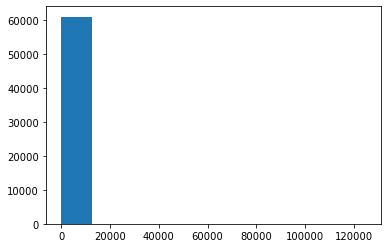

In [58]:
plt.hist(x= hop_teaming_nashville[(hop_teaming_nashville['transaction_count'] >=50) &
                                  (hop_teaming_nashville['average_day_wait'] <= 50) 
                                  & (hop_teaming_nashville['average_day_wait'] > 0)]['patient_count']);

In [59]:
hop_teaming_nashville[(hop_teaming_nashville['transaction_count'] >=50) &
                                  (hop_teaming_nashville['average_day_wait'] <= 50) 
                                  & (hop_teaming_nashville['average_day_wait'] > 0)]

,from_npi,to_npi,patient_count,transaction_count,average_day_wait,std_day_wait,from_org_name,from_last_name,from_first_name,from_middle_name,...,to_credential,to_address,to_2_address,to_city,to_state,to_zip,to_zip,to_usps_pref_city,from_taxonomy_code,to_taxonomy_code
3,1447431275,1013313857,66,67,45.463,59.917,None,WATKINS,JEREMIAH,RAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207ZP0102X,207R00000X
37,1447431275,1225034333,66,67,39.940,67.920,None,WATKINS,JEREMIAH,RAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207ZP0102X,282N00000X
52,1447431275,1265502892,61,65,45.292,76.381,None,WATKINS,JEREMIAH,RAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207ZP0102X,174400000X
54,1447431275,1275729691,510,545,34.339,53.351,None,WATKINS,JEREMIAH,RAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207ZP0102X,207RC0000X
56,1447431275,1295193399,57,57,35.316,58.367,None,WATKINS,JEREMIAH,RAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207ZP0102X,207RG0100X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409027,1770571176,1649420670,45,70,0.100,0.837,None,SEKULOVSKI,BILL,None,...,None,100 BETA DR UNIT A,None,FRANKLIN,TN,37064,37064.0,FRANKLIN,207Q00000X,261QM1300X
409036,1053342154,1679525919,58,218,0.018,0.214,None,MAJHAIL,NAVNEET,SINGH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207RH0000X,282N00000X
409037,1356449201,1679525919,77,92,0.859,6.837,None,KALLIANPUR,ASHA,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207RH0000X,282N00000X
409065,1487941522,1740479674,23,56,1.500,11.225,None,NGO,PAUL,JOHN,...,None,107 CHARLES E DAVIS BLVD,None,NASHVILLE,TN,37210,37210.0,NASHVILLE,207Q00000X,261QF0400X


In [62]:
pd.set_option('display.max_columns', 100)
hop_teaming_nashville[hop_teaming_nashville['from_npi'] == 1447431275]

,from_npi,to_npi,patient_count,transaction_count,average_day_wait,std_day_wait,from_org_name,from_last_name,from_first_name,from_middle_name,from_credential,from_address,from_2_address,from_city,from_state,from_zip,from_zip,from_usps_pref_city,to_org_name,to_last_name,to_first_name,to_middle_name,to_credential,to_address,to_2_address,to_city,to_state,to_zip,to_zip,to_usps_pref_city,from_taxonomy_code,to_taxonomy_code
0,1447431275,1003000308,13,13,28.077,53.761,None,WATKINS,JEREMIAH,RAY,M.D.,5301 VIRGINIA WAY,SUITE 300,BRENTWOOD,TN,37027,37027,BRENTWOOD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207ZP0102X,231H00000X
1,1447431275,1003863580,37,39,94.179,74.406,None,WATKINS,JEREMIAH,RAY,M.D.,5301 VIRGINIA WAY,SUITE 300,BRENTWOOD,TN,37027,37027,BRENTWOOD,"ASSOCIATED PATHOLOGISTS, LLC",None,None,None,None,5301 VIRGINIA WAY STE 300,None,BRENTWOOD,TN,37027,37027.0,BRENTWOOD,207ZP0102X,207ZP0102X
2,1447431275,1003993965,21,22,38.273,76.875,None,WATKINS,JEREMIAH,RAY,M.D.,5301 VIRGINIA WAY,SUITE 300,BRENTWOOD,TN,37027,37027,BRENTWOOD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207ZP0102X,261QS0132X
3,1447431275,1013313857,66,67,45.463,59.917,None,WATKINS,JEREMIAH,RAY,M.D.,5301 VIRGINIA WAY,SUITE 300,BRENTWOOD,TN,37027,37027,BRENTWOOD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207ZP0102X,207R00000X
4,1447431275,1013455963,14,14,9.357,13.793,None,WATKINS,JEREMIAH,RAY,M.D.,5301 VIRGINIA WAY,SUITE 300,BRENTWOOD,TN,37027,37027,BRENTWOOD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207ZP0102X,207RN0300X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,1447431275,1982674636,128,129,39.946,62.158,None,WATKINS,JEREMIAH,RAY,M.D.,5301 VIRGINIA WAY,SUITE 300,BRENTWOOD,TN,37027,37027,BRENTWOOD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207ZP0102X,341600000X
175,1447431275,1992003479,29,29,98.862,102.557,None,WATKINS,JEREMIAH,RAY,M.D.,5301 VIRGINIA WAY,SUITE 300,BRENTWOOD,TN,37027,37027,BRENTWOOD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207ZP0102X,213ES0103X
176,1447431275,1992736227,16,17,63.706,64.756,None,WATKINS,JEREMIAH,RAY,M.D.,5301 VIRGINIA WAY,SUITE 300,BRENTWOOD,TN,37027,37027,BRENTWOOD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207ZP0102X,251E00000X
177,1447431275,1992766273,34,34,75.029,63.361,None,WATKINS,JEREMIAH,RAY,M.D.,5301 VIRGINIA WAY,SUITE 300,BRENTWOOD,TN,37027,37027,BRENTWOOD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207ZP0102X,251E00000X


In [85]:
hop_teaming_tn = hop_teaming_nashville[(hop_teaming_nashville['to_state'] == 'TN') &
                     (hop_teaming_nashville['transaction_count'] >= 50)
                     & (hop_teaming_nashville['average_day_wait'] <= 50)
                     & (hop_teaming_nashville['average_day_wait']> 0)]

In [68]:
query = '''
SELECT *
FROM npi
WHERE npi = 1003000308
'''

with sqlite3.connect('data/hop_team.sqlite') as db:
    test = pd.read_sql(query,db)

In [86]:
hop_teaming_tn = hop_teaming_tn.drop(columns=['from_org_name','to_last_name','to_first_name','to_middle_name','to_credential'])

In [87]:
hop_teaming_tn

,from_npi,to_npi,patient_count,transaction_count,average_day_wait,std_day_wait,from_last_name,from_first_name,from_middle_name,from_credential,from_address,from_2_address,from_city,from_state,from_zip,from_zip,from_usps_pref_city,to_org_name,to_address,to_2_address,to_city,to_state,to_zip,to_zip,to_usps_pref_city,from_taxonomy_code,to_taxonomy_code
415,1104183235,1104202761,202,216,0.097,1.429,HOGAN,MICHAEL,EMERSON,M.D.,MEDICAL CENTER NORTH 1161 21ST AVE S,None,NASHVILLE,TN,37232,37232,NASHVILLE,VANDERBILT UNIVERSITY MEDICAL CENTER,1301 22ND AVE S,None,NASHVILLE,TN,37232,37232.0,NASHVILLE,2085R0202X,207R00000X
492,1104183235,1396882205,190,192,4.630,6.726,HOGAN,MICHAEL,EMERSON,M.D.,MEDICAL CENTER NORTH 1161 21ST AVE S,None,NASHVILLE,TN,37232,37232,NASHVILLE,VANDERBILT UNIVERSITY MEDICAL CENTER,1211 MEDICAL CENTER DRIVE,None,NASHVILLE,TN,37232,37232.0,NASHVILLE,2085R0202X,282N00000X
633,1093753303,1003152208,200,305,23.184,45.890,WELCH,DEREK,C.,M.D.,5301 VIRGINIA WAY,SUITE 300,BRENTWOOD,TN,37027,37027,BRENTWOOD,"TRISTAR GYNECOLOGY ONCOLOGY, LLC",330 23RD AVE N,SUITE 600,NASHVILLE,TN,37203,37203.0,NASHVILLE,207ZP0102X,207VX0201X
707,1093753303,1003910688,883,1022,47.051,61.911,WELCH,DEREK,C.,M.D.,5301 VIRGINIA WAY,SUITE 300,BRENTWOOD,TN,37027,37027,BRENTWOOD,"NOL, LLC",1210 BRIARVILLE RD,SUITE 602-F,MADISON,TN,37115,37115.0,MADISON,207ZP0102X,2085R0202X
740,1093753303,1013115005,48,75,26.200,28.119,WELCH,DEREK,C.,M.D.,5301 VIRGINIA WAY,SUITE 300,BRENTWOOD,TN,37027,37027,BRENTWOOD,"REGIONAL REHABILITATION CENTER, PLLC",6290 MANCHESTER HWY,None,MORRISON,TN,37357,37357.0,MORRISON,207ZP0102X,261QP3300X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408823,1649798232,1467717306,42,73,2.767,23.642,IBRAHIM,ABISOLA,None,WHNP/AGPCNP,3904 GALLATIN PIKE,None,NASHVILLE,TN,37216,37216,NASHVILLE,"UNITED NEIGHBORHOOD HEALTH SERVICES, INC",905 MAIN ST,None,NASHVILLE,TN,37206,37206.0,NASHVILLE,363LW0102X,261QF0400X
408880,1548701469,1497012959,41,54,0.037,0.272,WELBOURN,DAVID,JOHN,PA,941 SHARPE AVE,None,NASHVILLE,TN,37206,37206,NASHVILLE,"TRUSTPOINT HOSPITAL, LLC",1009 N. THOMPSON LN,None,MURFREESBORO,TN,37128,37128.0,MURFREESBORO,363A00000X,283Q00000X
408920,1508364068,1528281623,46,58,0.862,3.436,MCCOY,ALLISON,None,PA-C,2004 HAYES ST STE 200,None,NASHVILLE,TN,37203,37203,NASHVILLE,"ELITE SPORTS MEDICINE AND ORTHOPAEDIC CENTER, PLC",2004 HAYES ST STE 200,None,NASHVILLE,TN,37203,37203.0,NASHVILLE,363A00000X,174400000X
409027,1770571176,1649420670,45,70,0.100,0.837,SEKULOVSKI,BILL,None,MD,1325 W MAIN ST,None,FRANKLIN,TN,37064,37064,FRANKLIN,"JAN ZWARTS VALLEY, LLC",100 BETA DR UNIT A,None,FRANKLIN,TN,37064,37064.0,FRANKLIN,207Q00000X,261QM1300X


***These may not be real referrals, as these are the same places:***

In [88]:
hop_teaming_tn[hop_teaming_tn['to_address'] == hop_teaming_tn['from_address']]

,from_npi,to_npi,patient_count,transaction_count,average_day_wait,std_day_wait,from_last_name,from_first_name,from_middle_name,from_credential,from_address,from_2_address,from_city,from_state,from_zip,from_zip,from_usps_pref_city,to_org_name,to_address,to_2_address,to_city,to_state,to_zip,to_zip,to_usps_pref_city,from_taxonomy_code,to_taxonomy_code
18629,1518264969,1255365284,167,222,14.320,41.808,CRAIG,SACHIE,HASE,O.D.,342 22ND AVE N,None,NASHVILLE,TN,37203,37203,NASHVILLE,DANIEL K BREGMAN MD PC,342 22ND AVE N,None,NASHVILLE,TN,37203,37203.0,NASHVILLE,152W00000X,207W00000X
18922,1528005667,1912953381,376,455,21.549,50.346,BENNETT,RICK,LEE,M.D.,4230 HARDING RD,SUITE 330,NASHVILLE,TN,37205,37205,NASHVILLE,CARDIOVASCULAR ANESTHESIOLOGISTS PC,4230 HARDING RD,SUITE 435,NASHVILLE,TN,37205,37205.0,NASHVILLE,207RC0000X,207LC0200X
18964,1518918143,1114990231,99,109,28.734,48.278,PETTIT,JONATHAN,R,M.D.,1050 N JAMES CAMPBELL BLVD,SUITE,COLUMBIA,TN,38401,38401,COLUMBIA,SURGERY CENTER OF MIDDLE TENNESSEE LLC,1050 N JAMES CAMPBELL BLVD,SUITE 120,COLUMBIA,TN,38401,38401.0,COLUMBIA,207X00000X,261QA1903X
19023,1518918143,1922057181,496,893,0.203,2.930,PETTIT,JONATHAN,R,M.D.,1050 N JAMES CAMPBELL BLVD,SUITE,COLUMBIA,TN,38401,38401,COLUMBIA,MID-TENNESSEE BONE & JOINT,1050 N JAMES CAMPBELL BLVD,SUITE 200,COLUMBIA,TN,38401,38401.0,COLUMBIA,207X00000X,207X00000X
19268,1538216403,1467460725,3779,4346,0.103,3.088,BERKLEY,NATHAN,R,MD,1224 TROTWOOD AVE,None,COLUMBIA,TN,38401,38401,COLUMBIA,"SOUTHERN RADIOLOGY ASSOCIATES, PLLC",1224 TROTWOOD AVE,None,COLUMBIA,TN,38401,38401.0,COLUMBIA,2085R0202X,2085R0202X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407582,1003054123,1194258855,27,139,0.446,5.259,TWOHEY,WENDY,LYNN,D.C.,125 COOL SPRINGS BLVD,SUITE 100,FRANKLIN,TN,37067,37067,FRANKLIN,"TENNESSEE WALK-IN CLINIC, PLLC",125 COOL SPRINGS BLVD,SUITE 110,FRANKLIN,TN,37067,37067.0,FRANKLIN,111N00000X,208D00000X
407738,1396724076,1205859279,47,72,3.611,21.725,LIMBIRD,THOMAS,JAMES,M.D.,1005 DR. D. B. TODD BLVD,None,NASHVILLE,TN,37208,37208,NASHVILLE,MEHARRY MEDICAL COLLEGE,1005 DR. D. B. TODD BLVD,None,NASHVILLE,TN,37208,37208.0,NASHVILLE,207X00000X,261Q00000X
407792,1639221641,1215364633,18,57,0.193,1.457,COLLINS,CYNTHIA,ELIZABETH,MD,5247 HARDING PL,None,NASHVILLE,TN,37217,37217,NASHVILLE,"AMERICA CARES TRUST, INC",5247 HARDING PL,None,NASHVILLE,TN,37217,37217.0,NASHVILLE,207Q00000X,207Q00000X
408920,1508364068,1528281623,46,58,0.862,3.436,MCCOY,ALLISON,None,PA-C,2004 HAYES ST STE 200,None,NASHVILLE,TN,37203,37203,NASHVILLE,"ELITE SPORTS MEDICINE AND ORTHOPAEDIC CENTER, PLC",2004 HAYES ST STE 200,None,NASHVILLE,TN,37203,37203.0,NASHVILLE,363A00000X,174400000X


In [118]:
top_patient_facilities = pd.DataFrame(hop_teaming_tn.groupby(['to_org_name'])['patient_count'].sum()).reset_index().sort_values('patient_count', ascending=False)

In [122]:
top_patient_facilities[top_patient_facilities['to_org_name'].str.contains('VANDERBILT')]

,to_org_name,patient_count
799,VANDERBILT UNIVERSITY MEDICAL CENTER,985794
794,VANDERBILT HEALTH AND WILLIAMSON MEDICAL CENTE...,10138
796,"VANDERBILT IMAGING SERVICES, LLC",8102
798,VANDERBILT STALLWORTH REHABILITATION HOSPITAL LP,2792
795,"VANDERBILT HOME CARE SERVICES, LLC",308
797,"VANDERBILT MAURY RADIATION ONCOLOGY, LLC",45


Vanderbilt radiation oncology has the fewest patients, as well as vanderbilt home care.

Want to take a look at these places by specialty, see in what specialties vanderbilt is not the leading facility for referral. Need to merge in taxonomy. James filled specialization with classification. Might be best to use classification only.

In [ ]:
#James code for taxonomy classifications 
#2nucc_sqlite['specialization'] = nucc_sqlite['specialization'].fillna(nucc_sqlite['classification'])

In [286]:
tax_hop_tn = pd.merge(hop_teaming_tn,
                      taxonomy_dict[['Code','Classification','Specialization']].rename(columns={'Code':'from_taxonomy_code',
                                                                          'Classification':'from_classification',
                                                                          'Specialization':'from_specilization'}),
                      how = 'left',
                      on = 'from_taxonomy_code')

In [287]:
tax_hop_tn

,from_npi,to_npi,patient_count,transaction_count,average_day_wait,std_day_wait,from_last_name,from_first_name,from_middle_name,from_credential,from_address,from_2_address,from_city,from_state,from_zip,from_zip,from_usps_pref_city,to_org_name,to_address,to_2_address,to_city,to_state,to_zip,to_zip,to_usps_pref_city,from_taxonomy_code,to_taxonomy_code,from_classification,from_specilization
0,1104183235,1104202761,202,216,0.097,1.429,HOGAN,MICHAEL,EMERSON,M.D.,MEDICAL CENTER NORTH 1161 21ST AVE S,None,NASHVILLE,TN,37232,37232,NASHVILLE,VANDERBILT UNIVERSITY MEDICAL CENTER,1301 22ND AVE S,None,NASHVILLE,TN,37232,37232.0,NASHVILLE,2085R0202X,207R00000X,Radiology,Diagnostic Radiology
1,1104183235,1396882205,190,192,4.630,6.726,HOGAN,MICHAEL,EMERSON,M.D.,MEDICAL CENTER NORTH 1161 21ST AVE S,None,NASHVILLE,TN,37232,37232,NASHVILLE,VANDERBILT UNIVERSITY MEDICAL CENTER,1211 MEDICAL CENTER DRIVE,None,NASHVILLE,TN,37232,37232.0,NASHVILLE,2085R0202X,282N00000X,Radiology,Diagnostic Radiology
2,1093753303,1003152208,200,305,23.184,45.890,WELCH,DEREK,C.,M.D.,5301 VIRGINIA WAY,SUITE 300,BRENTWOOD,TN,37027,37027,BRENTWOOD,"TRISTAR GYNECOLOGY ONCOLOGY, LLC",330 23RD AVE N,SUITE 600,NASHVILLE,TN,37203,37203.0,NASHVILLE,207ZP0102X,207VX0201X,Pathology,Anatomic Pathology & Clinical Pathology
3,1093753303,1003910688,883,1022,47.051,61.911,WELCH,DEREK,C.,M.D.,5301 VIRGINIA WAY,SUITE 300,BRENTWOOD,TN,37027,37027,BRENTWOOD,"NOL, LLC",1210 BRIARVILLE RD,SUITE 602-F,MADISON,TN,37115,37115.0,MADISON,207ZP0102X,2085R0202X,Pathology,Anatomic Pathology & Clinical Pathology
4,1093753303,1013115005,48,75,26.200,28.119,WELCH,DEREK,C.,M.D.,5301 VIRGINIA WAY,SUITE 300,BRENTWOOD,TN,37027,37027,BRENTWOOD,"REGIONAL REHABILITATION CENTER, PLLC",6290 MANCHESTER HWY,None,MORRISON,TN,37357,37357.0,MORRISON,207ZP0102X,261QP3300X,Pathology,Anatomic Pathology & Clinical Pathology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43639,1649798232,1467717306,42,73,2.767,23.642,IBRAHIM,ABISOLA,None,WHNP/AGPCNP,3904 GALLATIN PIKE,None,NASHVILLE,TN,37216,37216,NASHVILLE,"UNITED NEIGHBORHOOD HEALTH SERVICES, INC",905 MAIN ST,None,NASHVILLE,TN,37206,37206.0,NASHVILLE,363LW0102X,261QF0400X,Nurse Practitioner,Women's Health
43640,1548701469,1497012959,41,54,0.037,0.272,WELBOURN,DAVID,JOHN,PA,941 SHARPE AVE,None,NASHVILLE,TN,37206,37206,NASHVILLE,"TRUSTPOINT HOSPITAL, LLC",1009 N. THOMPSON LN,None,MURFREESBORO,TN,37128,37128.0,MURFREESBORO,363A00000X,283Q00000X,Physician Assistant,NaN
43641,1508364068,1528281623,46,58,0.862,3.436,MCCOY,ALLISON,None,PA-C,2004 HAYES ST STE 200,None,NASHVILLE,TN,37203,37203,NASHVILLE,"ELITE SPORTS MEDICINE AND ORTHOPAEDIC CENTER, PLC",2004 HAYES ST STE 200,None,NASHVILLE,TN,37203,37203.0,NASHVILLE,363A00000X,174400000X,Physician Assistant,NaN
43642,1770571176,1649420670,45,70,0.100,0.837,SEKULOVSKI,BILL,None,MD,1325 W MAIN ST,None,FRANKLIN,TN,37064,37064,FRANKLIN,"JAN ZWARTS VALLEY, LLC",100 BETA DR UNIT A,None,FRANKLIN,TN,37064,37064.0,FRANKLIN,207Q00000X,261QM1300X,Family Medicine,NaN


In [288]:
tax_hop_tn = pd.merge(tax_hop_tn,
                     taxonomy_dict[['Code','Classification','Specialization']].rename(columns={'Code':'to_taxonomy_code',
                                                                          'Classification':'to_classification',
                                                                          'Specialization':'to_specilization'}),
                     how = 'left',
                     on = 'to_taxonomy_code')

In [292]:
tax_hop_tn

,from_npi,to_npi,patient_count,transaction_count,average_day_wait,std_day_wait,from_last_name,from_first_name,from_middle_name,from_credential,from_address,from_2_address,from_city,from_state,from_zip,from_zip,from_usps_pref_city,to_org_name,to_address,to_2_address,to_city,to_state,to_zip,to_zip,to_usps_pref_city,from_taxonomy_code,to_taxonomy_code,from_classification,from_specilization,to_classification,to_specilization
0,1104183235,1104202761,202,216,0.097,1.429,HOGAN,MICHAEL,EMERSON,M.D.,MEDICAL CENTER NORTH 1161 21ST AVE S,None,NASHVILLE,TN,37232,37232,NASHVILLE,VANDERBILT UNIVERSITY MEDICAL CENTER,1301 22ND AVE S,None,NASHVILLE,TN,37232,37232.0,NASHVILLE,2085R0202X,207R00000X,Radiology,Diagnostic Radiology,Internal Medicine,NaN
1,1104183235,1396882205,190,192,4.630,6.726,HOGAN,MICHAEL,EMERSON,M.D.,MEDICAL CENTER NORTH 1161 21ST AVE S,None,NASHVILLE,TN,37232,37232,NASHVILLE,VANDERBILT UNIVERSITY MEDICAL CENTER,1211 MEDICAL CENTER DRIVE,None,NASHVILLE,TN,37232,37232.0,NASHVILLE,2085R0202X,282N00000X,Radiology,Diagnostic Radiology,General Acute Care Hospital,NaN
2,1093753303,1003152208,200,305,23.184,45.890,WELCH,DEREK,C.,M.D.,5301 VIRGINIA WAY,SUITE 300,BRENTWOOD,TN,37027,37027,BRENTWOOD,"TRISTAR GYNECOLOGY ONCOLOGY, LLC",330 23RD AVE N,SUITE 600,NASHVILLE,TN,37203,37203.0,NASHVILLE,207ZP0102X,207VX0201X,Pathology,Anatomic Pathology & Clinical Pathology,Obstetrics & Gynecology,Gynecologic Oncology
3,1093753303,1003910688,883,1022,47.051,61.911,WELCH,DEREK,C.,M.D.,5301 VIRGINIA WAY,SUITE 300,BRENTWOOD,TN,37027,37027,BRENTWOOD,"NOL, LLC",1210 BRIARVILLE RD,SUITE 602-F,MADISON,TN,37115,37115.0,MADISON,207ZP0102X,2085R0202X,Pathology,Anatomic Pathology & Clinical Pathology,Radiology,Diagnostic Radiology
4,1093753303,1013115005,48,75,26.200,28.119,WELCH,DEREK,C.,M.D.,5301 VIRGINIA WAY,SUITE 300,BRENTWOOD,TN,37027,37027,BRENTWOOD,"REGIONAL REHABILITATION CENTER, PLLC",6290 MANCHESTER HWY,None,MORRISON,TN,37357,37357.0,MORRISON,207ZP0102X,261QP3300X,Pathology,Anatomic Pathology & Clinical Pathology,Clinic/Center,Pain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43639,1649798232,1467717306,42,73,2.767,23.642,IBRAHIM,ABISOLA,None,WHNP/AGPCNP,3904 GALLATIN PIKE,None,NASHVILLE,TN,37216,37216,NASHVILLE,"UNITED NEIGHBORHOOD HEALTH SERVICES, INC",905 MAIN ST,None,NASHVILLE,TN,37206,37206.0,NASHVILLE,363LW0102X,261QF0400X,Nurse Practitioner,Women's Health,Clinic/Center,Federally Qualified Health Center (FQHC)
43640,1548701469,1497012959,41,54,0.037,0.272,WELBOURN,DAVID,JOHN,PA,941 SHARPE AVE,None,NASHVILLE,TN,37206,37206,NASHVILLE,"TRUSTPOINT HOSPITAL, LLC",1009 N. THOMPSON LN,None,MURFREESBORO,TN,37128,37128.0,MURFREESBORO,363A00000X,283Q00000X,Physician Assistant,NaN,Psychiatric Hospital,NaN
43641,1508364068,1528281623,46,58,0.862,3.436,MCCOY,ALLISON,None,PA-C,2004 HAYES ST STE 200,None,NASHVILLE,TN,37203,37203,NASHVILLE,"ELITE SPORTS MEDICINE AND ORTHOPAEDIC CENTER, PLC",2004 HAYES ST STE 200,None,NASHVILLE,TN,37203,37203.0,NASHVILLE,363A00000X,174400000X,Physician Assistant,NaN,Specialist,NaN
43642,1770571176,1649420670,45,70,0.100,0.837,SEKULOVSKI,BILL,None,MD,1325 W MAIN ST,None,FRANKLIN,TN,37064,37064,FRANKLIN,"JAN ZWARTS VALLEY, LLC",100 BETA DR UNIT A,None,FRANKLIN,TN,37064,37064.0,FRANKLIN,207Q00000X,261QM1300X,Family Medicine,NaN,Clinic/Center,Multi-Specialty


In [293]:
conditions = [tax_hop_tn['to_org_name'].str.contains('VANDERBILT'), ~tax_hop_tn['to_org_name'].str.contains('VANDERBILT')]
choices = ['Vanderbilt','Other']

tax_hop_tn['Vanderbilt?'] = np.select(conditions, choices)

In [294]:
classification_vandy = pd.DataFrame(tax_hop_tn.groupby(['to_classification','Vanderbilt?'])['patient_count'].sum()).reset_index()

In [295]:
vandy_classifications = classification_vandy[classification_vandy['Vanderbilt?'] == 'Vanderbilt'].to_classification.to_list()

In [296]:
vandy_classifications

['Clinic/Center',
 'General Acute Care Hospital',
 'Home Health',
 'Internal Medicine',
 'Pharmacy',
 'Psychiatric Unit',
 'Radiology',
 'Rehabilitation Hospital',
 'Rehabilitation Unit']

In [297]:
classification_vandy[classification_vandy['to_classification'].isin(vandy_classifications)]

,to_classification,Vanderbilt?,patient_count
6,Clinic/Center,Other,127796
7,Clinic/Center,Vanderbilt,635
17,General Acute Care Hospital,Other,1011330
18,General Acute Care Hospital,Vanderbilt,445977
20,Home Health,Other,11069
21,Home Health,Vanderbilt,308
25,Internal Medicine,Other,1805706
26,Internal Medicine,Vanderbilt,541332
42,Pharmacy,Other,4185
43,Pharmacy,Vanderbilt,7864


In [298]:
import seaborn as sns

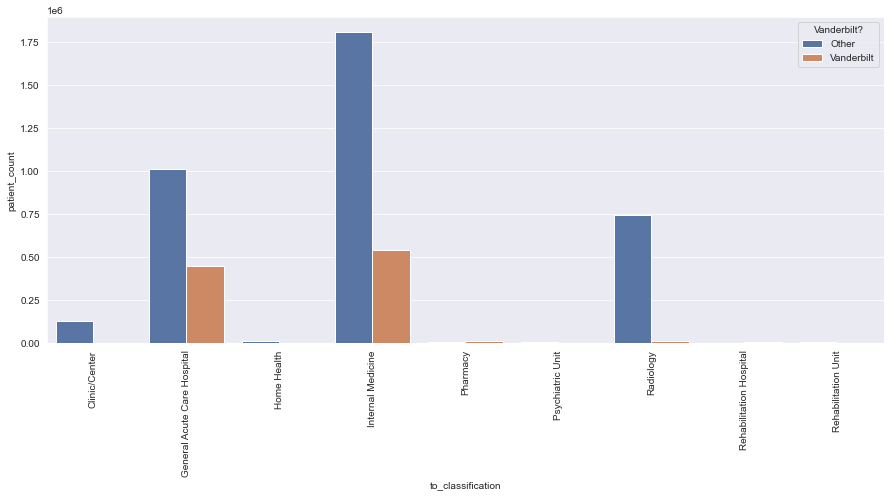

In [299]:
ax = sns.barplot(x = 'to_classification',
                 y = 'patient_count',
                 hue = 'Vanderbilt?', 
                 data = classification_vandy[classification_vandy['to_classification'].isin(vandy_classifications)])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);

In [300]:
tax_hop_grouped = pd.DataFrame(tax_hop_tn[['to_classification','to_org_name','patient_count']].groupby(['to_classification','to_org_name'])['patient_count'].sum())

In [301]:
tax_hop_grouped = tax_hop_grouped.reset_index()

In [302]:
tax_hop_grouped_sorted = tax_hop_grouped.groupby(['to_classification']).apply(lambda x: x.sort_values(["patient_count"], ascending = False))

In [303]:
tax_hop_grouped_sorted = tax_hop_grouped_sorted.reset_index(drop = True)

In [304]:
tax_hop_grouped_sorted = tax_hop_grouped_sorted.groupby('to_classification').head(5)

In [305]:
tax_hop_grouped_sorted[tax_hop_grouped_sorted['to_org_name'].str.contains('VANDERBILT')]['to_classification'].to_list()

['General Acute Care Hospital',
 'Internal Medicine',
 'Pharmacy',
 'Psychiatric Unit',
 'Rehabilitation Hospital']

Vanderbilt is a top 5 hospital in 5 classifications:
- General Care hospital
- internal medicine
- pharmacy
- psych unit
- rehab hospital


In [306]:
top_5_vandy = tax_hop_grouped_sorted[tax_hop_grouped_sorted['to_org_name'].str.contains('VANDERBILT')]['to_classification'].to_list()

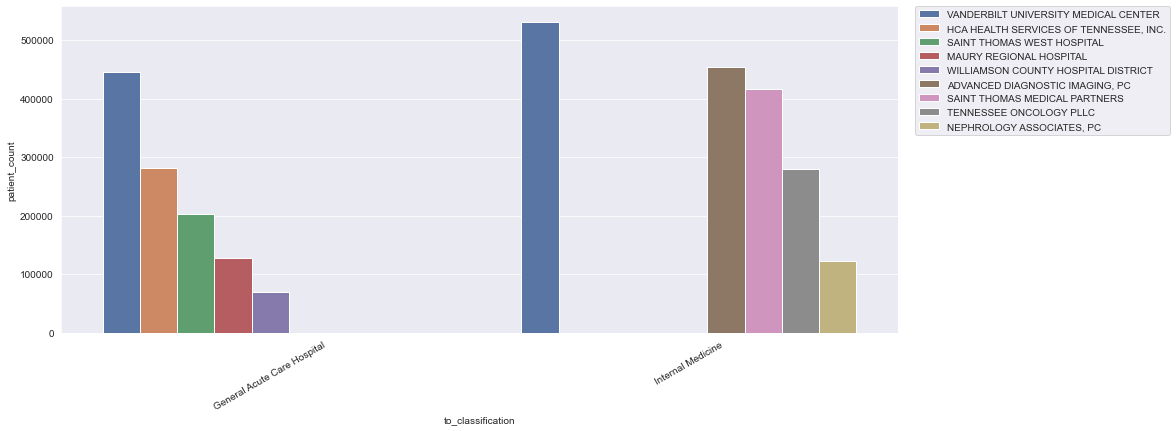

In [307]:
ax = sns.barplot(x = 'to_classification',
                 y= 'patient_count',
                 hue = 'to_org_name',
                data = tax_hop_grouped_sorted[tax_hop_grouped_sorted['to_classification'].isin(top_5_vandy[0:2])])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
sns.set({'figure.figsize':(15,6)});

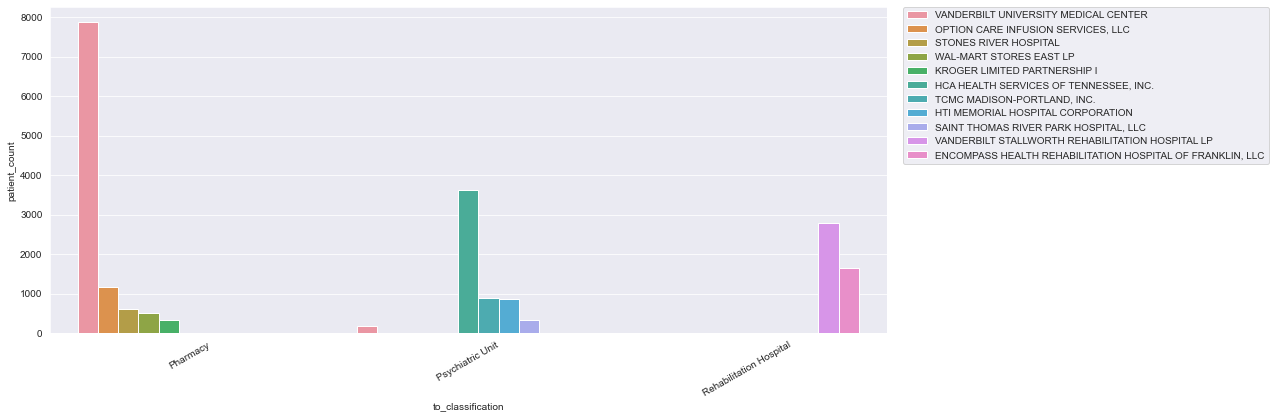

In [308]:
ax = sns.barplot(x = 'to_classification',
                 y= 'patient_count',
                 hue = 'to_org_name',
                data = tax_hop_grouped_sorted[tax_hop_grouped_sorted['to_classification'].isin(top_5_vandy[2:])])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
sns.set({'figure.figsize':(15,6)});

In [309]:
tax_hop_grouped_sorted[tax_hop_grouped_sorted['to_classification'].isin(top_5_vandy)]

,to_classification,to_org_name,patient_count
297,General Acute Care Hospital,VANDERBILT UNIVERSITY MEDICAL CENTER,445977
298,General Acute Care Hospital,"HCA HEALTH SERVICES OF TENNESSEE, INC.",281672
299,General Acute Care Hospital,SAINT THOMAS WEST HOSPITAL,202180
300,General Acute Care Hospital,MAURY REGIONAL HOSPITAL,126920
301,General Acute Care Hospital,WILLIAMSON COUNTY HOSPITAL DISTRICT,69796
362,Internal Medicine,VANDERBILT UNIVERSITY MEDICAL CENTER,531194
363,Internal Medicine,"ADVANCED DIAGNOSTIC IMAGING, PC",454129
364,Internal Medicine,SAINT THOMAS MEDICAL PARTNERS,416814
365,Internal Medicine,TENNESSEE ONCOLOGY PLLC,278818
366,Internal Medicine,"NEPHROLOGY ASSOCIATES, PC",121851


In [344]:
proportion = pd.DataFrame(tax_hop_tn.groupby('to_classification')['patient_count'].sum())

In [345]:
proportion = pd.merge(tax_hop_grouped_sorted, proportion, on = 'to_classification')

In [347]:
proportion = proportion.rename(columns={'patient_count_x':'patient_count', 'patient_count_y':'total'})

In [349]:
proportion['percentage'] = (proportion['patient_count']/proportion['total']) *100

In [352]:
proportion[proportion['to_org_name'].str.contains('VANDERBILT')]

,to_classification,to_org_name,patient_count,total,percentage
53,General Acute Care Hospital,VANDERBILT UNIVERSITY MEDICAL CENTER,445977,1457307,30.602817
77,Internal Medicine,VANDERBILT UNIVERSITY MEDICAL CENTER,531194,2347038,22.632527
139,Pharmacy,VANDERBILT UNIVERSITY MEDICAL CENTER,7864,12049,65.266827
175,Psychiatric Unit,VANDERBILT UNIVERSITY MEDICAL CENTER,183,6212,2.945911
193,Rehabilitation Hospital,VANDERBILT STALLWORTH REHABILITATION HOSPITAL LP,2792,4445,62.812148


**Vanderbilt University Medical Center is leading facility in:**
- internal medicine
- General Acute Care Hospital
- Pharmacy

In [310]:
from_npi_to_vandy = pd.DataFrame(tax_hop_tn.groupby(['from_npi','Vanderbilt?'])['patient_count'].sum()).reset_index()

In [311]:
from_npi_to_vandy

,from_npi,Vanderbilt?,patient_count
0,1003013160,Other,317
1,1003013160,Vanderbilt,32
2,1003013947,Other,606
3,1003019902,Vanderbilt,532
4,1003031261,Other,752
...,...,...,...
7426,1992960298,Vanderbilt,150
7427,1992961841,Other,211
7428,1992978845,Other,183
7429,1992985949,Other,1550


In [312]:
from_npi_to_vandy = from_npi_to_vandy.pivot_table(index = 'from_npi', columns = 'Vanderbilt?', values = 'patient_count').reset_index().fillna(0)

In [313]:
from_npi_to_vandy[from_npi_to_vandy['Other'] > from_npi_to_vandy['Vanderbilt']].sort_values('Other', ascending=False)

Vanderbilt?,from_npi,Other,Vanderbilt
504,1093753303,349710.0,899.0
2426,1417131715,39238.0,0.0
3543,1609848563,38635.0,0.0
4998,1871548818,27257.0,0.0
751,1134321235,27122.0,149.0
...,...,...,...
4675,1811123144,14.0,0.0
1109,1194895193,14.0,0.0
4965,1861608895,13.0,0.0
3507,1609058130,12.0,0.0


4222 doctors referred more patients to other facilities than to vandy. 1505 doctors referred to vanderbilt more often.

In [314]:
problem_docs = from_npi_to_vandy[from_npi_to_vandy['Other'] > from_npi_to_vandy['Vanderbilt']]['from_npi'].to_list()

In [336]:
prob_cities = pd.DataFrame(tax_hop_tn[tax_hop_tn['from_npi'].isin(problem_docs)].value_counts('from_city')).reset_index()['from_city'].to_list()

In [335]:
good_cities = pd.DataFrame(tax_hop_tn[~tax_hop_tn['from_npi'].isin(problem_docs)].value_counts('from_city')).reset_index()['from_city'].to_list()

In [338]:
len(set(prob_cities)-set(good_cities))

33

In [340]:
pd.merge(pd.DataFrame(tax_hop_tn[tax_hop_tn['from_npi'].isin(problem_docs)].value_counts('from_city')).reset_index()
         ,pd.DataFrame(tax_hop_tn[~tax_hop_tn['from_npi'].isin(problem_docs)].value_counts('from_city')).reset_index(),
         on = 'from_city',
         how = 'inner')

,from_city,0_x,0_y
0,NASHVILLE,18352,3594
1,MURFREESBORO,3537,4
2,COLUMBIA,2053,8
3,GOODLETTSVILLE,1672,2
4,HERMITAGE,1656,1
5,HENDERSONVILLE,1617,3
6,FRANKLIN,1416,67
7,LEBANON,1156,12
8,BRENTWOOD,1115,21
9,DICKSON,906,1


Brentwood and Franklin stand out. These are cities close to nashville that do not refer to vanderbilt often

In [354]:
tax_hop_tn[tax_hop_tn['from_npi'] == 1093753303]

,from_npi,to_npi,patient_count,transaction_count,average_day_wait,std_day_wait,from_last_name,from_first_name,from_middle_name,from_credential,from_address,from_2_address,from_city,from_state,from_zip,from_zip,from_usps_pref_city,to_org_name,to_address,to_2_address,to_city,to_state,to_zip,to_zip,to_usps_pref_city,from_taxonomy_code,to_taxonomy_code,from_classification,from_specilization,to_classification,to_specilization,Vanderbilt?
2,1093753303,1003152208,200,305,23.184,45.890,WELCH,DEREK,C.,M.D.,5301 VIRGINIA WAY,SUITE 300,BRENTWOOD,TN,37027,37027,BRENTWOOD,"TRISTAR GYNECOLOGY ONCOLOGY, LLC",330 23RD AVE N,SUITE 600,NASHVILLE,TN,37203,37203.0,NASHVILLE,207ZP0102X,207VX0201X,Pathology,Anatomic Pathology & Clinical Pathology,Obstetrics & Gynecology,Gynecologic Oncology,Other
3,1093753303,1003910688,883,1022,47.051,61.911,WELCH,DEREK,C.,M.D.,5301 VIRGINIA WAY,SUITE 300,BRENTWOOD,TN,37027,37027,BRENTWOOD,"NOL, LLC",1210 BRIARVILLE RD,SUITE 602-F,MADISON,TN,37115,37115.0,MADISON,207ZP0102X,2085R0202X,Pathology,Anatomic Pathology & Clinical Pathology,Radiology,Diagnostic Radiology,Other
4,1093753303,1013115005,48,75,26.200,28.119,WELCH,DEREK,C.,M.D.,5301 VIRGINIA WAY,SUITE 300,BRENTWOOD,TN,37027,37027,BRENTWOOD,"REGIONAL REHABILITATION CENTER, PLLC",6290 MANCHESTER HWY,None,MORRISON,TN,37357,37357.0,MORRISON,207ZP0102X,261QP3300X,Pathology,Anatomic Pathology & Clinical Pathology,Clinic/Center,Pain,Other
5,1093753303,1013156231,129,191,28.314,38.480,WELCH,DEREK,C.,M.D.,5301 VIRGINIA WAY,SUITE 300,BRENTWOOD,TN,37027,37027,BRENTWOOD,"PAIN MANAGEMENT GROUP, P.C.",1547 WARRIOR DR,None,MURFREESBORO,TN,37128,37128.0,MURFREESBORO,207ZP0102X,174400000X,Pathology,Anatomic Pathology & Clinical Pathology,Specialist,NaN,Other
6,1093753303,1013930494,133,224,26.665,25.855,WELCH,DEREK,C.,M.D.,5301 VIRGINIA WAY,SUITE 300,BRENTWOOD,TN,37027,37027,BRENTWOOD,PRECISION PAIN CARE PLLC,519 ENON SPRINGS RD E,None,SMYRNA,TN,37167,37167.0,SMYRNA,207ZP0102X,207LP2900X,Pathology,Anatomic Pathology & Clinical Pathology,Anesthesiology,Pain Medicine,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,1093753303,1982933115,45,62,40.081,39.192,WELCH,DEREK,C.,M.D.,5301 VIRGINIA WAY,SUITE 300,BRENTWOOD,TN,37027,37027,BRENTWOOD,HARVEY W. BOWLES MD PC,2201 MURPHY AVE,STE 204,NASHVILLE,TN,37203,37203.0,NASHVILLE,207ZP0102X,207R00000X,Pathology,Anatomic Pathology & Clinical Pathology,Internal Medicine,NaN,Other
246,1093753303,1982949814,163,233,49.519,64.773,WELCH,DEREK,C.,M.D.,5301 VIRGINIA WAY,SUITE 300,BRENTWOOD,TN,37027,37027,BRENTWOOD,NASHVILLE PAIN & WELLNESS CENTER PLLC,7105 RAMSEY WAY,None,DICKSON,TN,37055,37055.0,DICKSON,207ZP0102X,207LP2900X,Pathology,Anatomic Pathology & Clinical Pathology,Anesthesiology,Pain Medicine,Other
247,1093753303,1992756779,146,241,35.062,38.541,WELCH,DEREK,C.,M.D.,5301 VIRGINIA WAY,SUITE 300,BRENTWOOD,TN,37027,37027,BRENTWOOD,TENNESSEE ONCOLOGY PLLC,1589 SPARTA ST STE 203,None,MCMINNVILLE,TN,37110,37110.0,MCMINNVILLE,207ZP0102X,207RH0003X,Pathology,Anatomic Pathology & Clinical Pathology,Internal Medicine,Hematology & Oncology,Other
248,1093753303,1992776405,2060,3436,15.872,37.309,WELCH,DEREK,C.,M.D.,5301 VIRGINIA WAY,SUITE 300,BRENTWOOD,TN,37027,37027,BRENTWOOD,"HCA HEALTH SERVICES OF TENNESSEE, INC.",200 STONECREST BLVD,None,SMYRNA,TN,37167,37167.0,SMYRNA,207ZP0102X,282N00000X,Pathology,Anatomic Pathology & Clinical Pathology,General Acute Care Hospital,NaN,Other


In [372]:
problem_class = pd.DataFrame(tax_hop_tn[tax_hop_tn['from_npi'].isin(problem_docs)].value_counts('from_classification')).reset_index()['from_classification'].to_list()

In [369]:
pd.DataFrame(tax_hop_tn[~tax_hop_tn['from_npi'].isin(problem_docs)].value_counts('from_classification')).reset_index()['from_classification'].to_list()

['Internal Medicine',
 'Nurse Practitioner',
 'Radiology',
 'Psychiatry & Neurology',
 'Anesthesiology',
 'Emergency Medicine',
 'Ophthalmology',
 'Surgery',
 'Nurse Anesthetist, Certified Registered',
 'Family Medicine',
 'Pathology',
 'Otolaryngology',
 'Orthopaedic Surgery',
 'Dermatology',
 'Physician Assistant',
 'Hospitalist',
 'Physical Therapist',
 'Urology',
 'Obstetrics & Gynecology',
 'Neurological Surgery',
 'Podiatrist',
 'Chiropractor',
 'Thoracic Surgery (Cardiothoracic Vascular Surgery)',
 'Optometrist',
 'Physical Medicine & Rehabilitation',
 'Transplant Surgery',
 'Allergy & Immunology',
 'Pediatrics',
 'Plastic Surgery',
 'Psychologist',
 'Specialist',
 'Nuclear Medicine',
 'Colon & Rectal Surgery',
 'Preventive Medicine',
 'Oral & Maxillofacial Surgery',
 'Social Worker',
 'Audiologist',
 'Clinical Neuropsychologist',
 'Pain Medicine',
 'Occupational Therapist',
 'Clinical Pharmacology',
 'Clinical Nurse Specialist']

In [382]:
pd.DataFrame(tax_hop_tn[tax_hop_tn['from_classification'] == 'Pathology'].groupby('to_org_name')['patient_count'].sum()).sort_values('patient_count', ascending = False).reset_index()

,to_org_name,patient_count
0,ASSOCIATED PATHOLOGISTS LLC,188962
1,"PATHGROUP LABS, LLC",120613
2,VANDERBILT UNIVERSITY MEDICAL CENTER,27228
3,TENNESSEE ONCOLOGY PLLC,22091
4,"HCA HEALTH SERVICES OF TENNESSEE, INC.",22075
...,...,...
310,TENNESSEE CVS PHARMACY LLC,31
311,RIVERGATE PSYCHIATRIC & BEHAVIORAL HEALTH,31
312,CLINICAL AND FORENSIC PSYCHOLOGY PROFESSIONAL LLC,31
313,PHARMACY CARE OF TENNESSEE,28


In [386]:
pathology.iloc[1].Name

AttributeError: 'Series' object has no attribute 'Name'

problem areas:
- from pathology

In [384]:
prob_list = []
good_list = []
for ele in problem_class:
    df = pd.DataFrame(tax_hop_tn[tax_hop_tn['from_classification'] == ele].groupby('to_org_name')['patient_count'].sum()).sort_values('patient_count', ascending = False).reset_index()
    if df['to_org_name'].iloc[1]].str.contains('VANDERBILT'):
        good_list = good_list.append(ele)
    else:
        prob_list = prob_list.append(ele)
    

AttributeError: 'str' object has no attribute 'str'